# Logistic Regression 

## Logistic Regression Model

The logistic regression model is a model that classify two classes 0 or 1 and tries to find a line $ w^{T}X $ that classify both points

![title](Classify.png)

## Sigmoid function

The function that classify is called sigmoid function this is the next 

$$ \sigma\left(w^{T}X\right) = \frac{1}{1+\exp^{-w^{T}X}} $$

The sigmoid function classify between 0 and 1 

![title](logistic.png)


## Sigmoid Code

In [1]:
import numpy as np

def sigmoid(x):
   return 1/(1+np.exp(-x))

N = 100
D = 2
## Random X matrix with dimension n,d
X = np.random.randn(N,D)
## The bias vector n,1
bias = np.array([[1]*N]).T
## Concatenate the ones vector with the X
Xb = np.concatenate((bias,X), axis = 1)
## Initialize the weights with D+1 dimension (with the bias)
w = np.random.rand(D+1)
z = np.dot(Xb,w)
sig = sigmoid(z)

sig[1:10]



array([ 0.71198199,  0.63664979,  0.73036224,  0.85146145,  0.79770603,
        0.63488629,  0.87221101,  0.79734835,  0.58072651])

## Interpretation of the sigmoid output

The interpretation of the sigmoid output is the probability that y is one given X

$$ P\left(Y = 1 | X \right) $$

## Training The model

The idea of training is to find the weights $w$ that classify in the best way the two classes

## Cross entropy cost function

The cross entropy cost function is 

$$ J = -\sum_{i = 1}^{n} Y_{i}\log \left(P_{i} \right) + \left(1-Y_{i}\right)\log \left(1-P_{i} \right)$$

where $Y_{i}$ is the real or target value in this case 0 or 1 and $P_{i}$ is the sigmoid value this is between 0 and 1

Now for example if we have predicted 0.9 and the actual value is 0 the error is 

$$ J = - \left(1\right)\log \left(0.1 \right) = 2.3 $$

we have made a huge error instead if we've predicted 0.9 and the actual value is 1 the cost will be

$$ J = - 1\log \left(0.9 \right) = 0.10 $$ and this is better




##  Cross entropy cost code

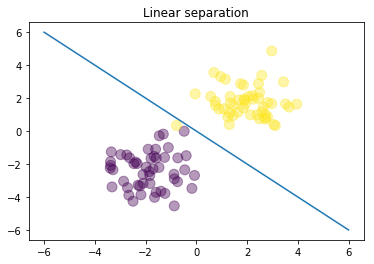

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 100
D = 2

X = np.random.randn(N,D)
## There are two kind of points gaussians more and gaussian less two
X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones,X),axis = 1)
w = np.random.randn(D+1)
z = np.dot(Xb,w)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(T,Y):
    E = -np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    return E

plt.scatter(X[:,0],X[:,1],c = T,s = 100,alpha=0.4)
x_axis = np.linspace(-6,6,100)
y_axis = -x_axis
plt.plot(x_axis,y_axis)
plt.title("Linear separation")
plt.show()

## Maximizing the likelihood

We know that 

$$ P(\left(Y_{n}=1|x\right) = \sigma\left(w^{t}X_{n} \right) = y_{n}$$

The Likelihood is 

$$ L = \prod_{i=1}^{n} y_{i}^{t_{i}} \left(1-y_{i} \right)^{1-t_{i}} = \prod_{i=1}^{n }P\left( y_{i} \lvert x_{i},w \right) $$

with $t_{n}\in \{0,1\}$

The idea is to maximize the Likelihood taken the log 

$$ l = \sum_{i=1}^{n} t_{i}\log \left(y_{i}\right) + \left(1-t_{n}\right)\log \left(\left(1-y_{i}\right)\right) $$

The last equation is the cost function

Now replacing $y_{i}$ to the sigmoid we get the next equation

$$ l = \sum_{i=1}^{n} \left(t_{n}-1\right)\left(w^{t}X_{i} \right)-\log \left(1 + e^{\left(-w^{t}X_{i} \right)} \right)$$

## Gradient descent

The gradient descent is a method to find the minumun of a function and the idea is to take small steps in the derivative direction this steps is the learning rate $\lambda$. The function that we want to minimize is the cross entropy.

if $$ J = -\sum_{i = 1}^{n} Y_{i}\log \left(P_{i} \right) + \left(1-Y_{i}\right)\log \left(1-P_{i} \right)$$

then taking the derivative and using the derivative of the sigmoid is $\sigma\left(x\right)(1-\sigma\left(x\right))$

$$\frac{\partial J}{\partial w_{j}} = \sum_{i = 1}^{n} \left(y_{i}-t_{i} \right)x_{ij} $$

The vectorized form is

$$ \frac{\partial J}{\partial w} = X^{T}\left(Y-T \right) $$ 

The first column of $X^{T}$ is one for the bias term 

The updating term is 

$$ W = W - \lambda \frac{\partial J}{\partial w} $$

When the learning rate is small the algorithm is so slow and if so large the algorithm could be diverge or oscilate so much

## Gradient descent In code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
N = 100
D = 2

X = np.random.randn(N,D)
## There are two kind of points gaussians more and gaussian less two
X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones,X),axis = 1)
wran = np.random.randn(D+1)
z = np.dot(Xb,wran)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(T,Y):
    E = -np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    return E

def GradientDescent(X,T,Y,w,lr,it=10000):
    for i in range(it):
        if i % 1000 == 0:
            print("Cross Entropy after " + str(i) + " Iteration is " + str(cross_entropy(T,Y)))
        w -= lr*np.dot(X.transpose(),(Y-T))
       # print(w)
        Y = sigmoid(np.dot(X,w))
        #print(Y)
    return w
        
    
    

#print("The initial error is : " + str(cross_entropy(T,sigmoid(z))))
#print(sigmoid(z))
wfinal = GradientDescent(Xb,T,sigmoid(z),wran,0.01)
wfinal


Cross Entropy after 0 Iteration is 731.706109376
Cross Entropy after 1000 Iteration is 0.0637535148927
Cross Entropy after 2000 Iteration is 0.0346931849552
Cross Entropy after 3000 Iteration is 0.0241258372934
Cross Entropy after 4000 Iteration is 0.0185884825276
Cross Entropy after 5000 Iteration is 0.0151604601691
Cross Entropy after 6000 Iteration is 0.0128218069518
Cross Entropy after 7000 Iteration is 0.0111209697515
Cross Entropy after 8000 Iteration is 0.00982652360729
Cross Entropy after 9000 Iteration is 0.00880732914949


array([ 0.50501024,  4.62797672,  3.98815545])

## Odds interpretation

the odds is the probability that one thing occurs divided by the probability doesn't ocurrs, therefore 

$$ \frac{P\left(Y=1|x \right)}{P\left(Y=0|x \right)} = \exp^{W^{T}X} \Rightarrow \log \left( \frac{P\left(Y=1|x \right)}{P\left(Y=0|x \right)}\right) = W^{T}X $$

This means that if the weights are bigger the probability that Y = 1 is bigger

## Regularization L2

The fisrt issue is overfitting, overfitting is when the model fit very well in the train data but not generalize very well in a new data

An example why we use regularization is in the picture of above $4x+4y=0 \Rightarrow  y=-x$ but if the weights are bigger the error cost is less but the performance is the same.

The L2 regularization penalize large weights but the bias is not included in the regularization

$$ J_{reg} = J + \frac{\lambda}{2} w^{T}w $$

The $\lambda$ parameter is a convenient number 

Then the new objective function to minimize is

$$ \frac{\partial J_{reg}}{\partial w} = X^{T}\left(Y-T \right) + \lambda w $$ 



## Evaluating the classifier

accuracy is not so good in some cases because if the negatives cases are the 90% then if the algorithms always predicted negative you have the 90% of accuracy but this is not good.

### Precision 

Fraction of positive prediction are actually positive

### Recall

Fraction of positive data predicted to be positive 

$$ Recall = \frac{true Positive}{true positive + false Negatives} $$

### Types of errors

1. If true label is positive and the predricted is positive  True Positive.

2. If true label is  negative and the predricted is negative  True Negative.

3. If true label is  negative and the predricted is positive  False Positive.

4. If true label is  positive and the predricted is positive  False Negative.


### Recall Vs Precision

Low Precision high recall predict almost everything positive Optimistic Model The threshold << 0.5

High precision low recall predict positive only when very sure Pesimistic Model The threshold >> 0.5



## Code Example of linear clssification

Cross Entropy after 0 Iteration is 271.193314344
Cross Entropy after 1000 Iteration is 0.372885816024
Cross Entropy after 2000 Iteration is 0.372885815917
Cross Entropy after 3000 Iteration is 0.372885815917
Cross Entropy after 4000 Iteration is 0.372885815917
Cross Entropy after 5000 Iteration is 0.372885815917
Cross Entropy after 6000 Iteration is 0.372885815917
Cross Entropy after 7000 Iteration is 0.372885815917
Cross Entropy after 8000 Iteration is 0.372885815917
Cross Entropy after 9000 Iteration is 0.372885815917


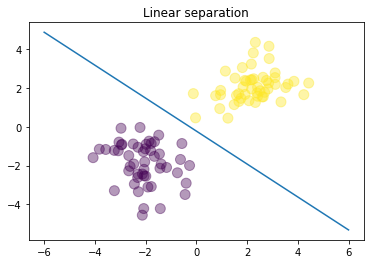

[ 0.54442011  2.11006473  2.4795346 ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
N = 100
D = 2

X = np.random.randn(N,D)
## There are two kind of points gaussians more and gaussian less two
X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones,X),axis = 1)
wran = np.random.randn(D+1)
z = np.dot(Xb,wran)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(T,Y):
    E = -np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    return E

def GradientDescent(X,T,Y,w,lr,it=10000):
    for i in range(it):
        if i % 1000 == 0:
            print("Cross Entropy after " + str(i) + " Iteration is " + str(cross_entropy(T,Y)))
        w -= lr*np.dot(X.transpose(),(Y-T)) + lr*0.1*w
        Y = sigmoid(np.dot(X,w))
    return w
        

wfinal = GradientDescent(Xb,T,sigmoid(z),wran,0.1)

plt.scatter(X[:,0],X[:,1],c = T,s = 100,alpha=0.4)
x_axis = np.linspace(-6,6,100)
y_axis =  -wfinal[0]/wfinal[2]-(wfinal[1]/wfinal[2])*x_axis
plt.plot(x_axis,y_axis)
plt.title("Linear separation")
plt.show()
print(wfinal)

## Regularization L1

When we use a lot of features there are more complexity in the model and we want only the important features

$$ J_{reg} = J + \lambda \left|w\right| $$

$$ \frac{\partial J_{reg}}{\partial w} = X^{T}\left(Y-T \right) + \lambda sign\left(w\right) $$ 

where 
$$ sign \left(x\right) = \begin{cases} 
      -1 & x < 0 \\
       1 & x > 0 \\
       0 & X = 0 
   \end{cases}
$$

## Donut Prolem


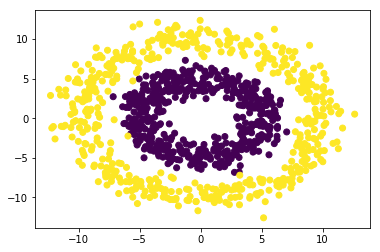

In [5]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
D = 2

R_inner = 5
R_outer = 10

R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

X = np.concatenate([X_inner,X_outer])
T = np.array([0]*int((N/2))+[1]*int((N/2)))
plt.scatter(X[:,0],X[:,1], c = T)
plt.show()

1749.8536266
149.641197041
93.3552391729
71.6209239279
59.8216902915
Final w: [ -1.19218712e+01   1.62070413e+00  -2.21559832e-02  -3.98406268e-03]
Final classificaton rate: 0.993


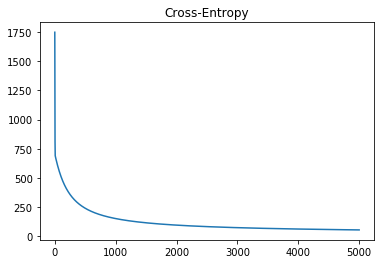

In [6]:
ones = np.array([[1]*N]).T
r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(np.dot(X[i,:],X[i,:]))
Xb = np.concatenate((ones,r,X),axis = 1)
w = np.random.rand(D+2)
z = np.dot(Xb,w)
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(T,Y):
    E = -np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    return E

Y = sigmoid(z)

learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T,Y)
    error.append(e)
    if i%1000 == 0:
        print(e)
    w += learning_rate*(np.dot((T-Y).T,Xb)-0.01*w)
    Y = sigmoid(np.dot(Xb,w))
plt.plot(error)
plt.title("Cross-Entropy")
print("Final w: " + str(w))

print("Final classificaton rate: " + str(1-(np.abs(T-np.round(Y))).sum()/N))
plt.show()


## One Hot Encoding

When a variable is categorical and example could be a country, each country is a feature and if the data is a country then is one only in the feature of that country.

Example a feature is country  $X_{i} = \left\{Brazil,Argentina,Chile\right\}$ then we have to create three new variables 
$X_{i,Brazil},X_{i,Argentina},X_{i,Chile}$ and each one is one if the data is the country


## Bag of Words

Bag of words is create a lot of features with the number of each words is in a text

## Predicting Sentiment

In this project we'll use scklearn package to predict the sentiment about reviews 

### Read the data

In [7]:
import pandas as pd
Baby = pd.read_csv("amazon_baby.csv")
Baby.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


### Removing the punctuation

The problem is in a text there are a lot of sign that doesn't mean nothing

In [8]:
import string
def removing_Puntuation(text):
    # This function get a table and the word that will be deleted
    
    return text.translate(string.punctuation)
Baby = Baby.fillna({'review':''}) 
Baby['review_clean'] = Baby['review'].apply(removing_Puntuation) 
Baby.head()

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"These flannel wipes are OK, but in my opinion ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed. i love...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase. I ...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried non-stop when I trie...


###  Removing middle reviews

In [9]:
Baby = Baby[Baby['rating'] != 3]
Baby['sentiment'] = Baby['rating'].apply(lambda rating : +1 if rating > 3 else -1)
Baby.head()

,name,review,rating,review_clean,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed. i love...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase. I ...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried non-stop when I trie...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"When the Binky Fairy came to our house, we did...",1


### Split the train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Baby[['name','review_clean']], Baby['sentiment'], test_size=0.2, random_state=42)

print("The number of examples is " + str(Baby.shape[0]))
print("The number of examples in the train data " + str(X_train.shape[0]))
print("The number of examples in the test data " + str(X_test.shape[0]))

The number of examples is 166752
The number of examples in the train data 133401
The number of examples in the test data 33351


###  Changing to sparse matrix

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['review_clean'])
## We can't use the previous fit_transform because we have to use the same words that train_matrix
test_matrix = vectorizer.transform(X_test['review_clean'])

### Train a logistic regression

In [12]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
fit = logistic.fit(train_matrix,y_train)


In [13]:
scores = logistic.decision_function(test_matrix)
print(scores)

[  0.03168572  -1.14586861  -1.76516782 ...,  11.46111593   8.36905041
   2.52361212]


### Predict

In [14]:
def predictedLabels(sco):
    pred = np.zeros(sco.shape[0])
    for i in range(sco.shape[0]):
        if sco[i] > 0:
           pred[i] = 1
        else:
           pred[i] = -1
    return pred

def sigmoid(x):
    return 1./(1+np.exp(-x))

Prediction = predictedLabels(scores)
Predictionprob = sigmoid(scores)
Predictionprob

array([ 0.50792077,  0.24124451,  0.14614429, ...,  0.99998947,
        0.99976812,  0.92578063])

### Accuracy


In [15]:
scoretrain = logistic.decision_function(train_matrix)
predlabelstrain = predictedLabels(scoretrain)
correctedClassify = np.sum(predlabelstrain==y_train)
accuracytrain = correctedClassify/y_train.shape[0]
accuracytrain

0.95832115201535217

In [16]:
scoretest = logistic.decision_function(test_matrix)
predlabelstest = predictedLabels(scoretest)
correctedClassifyTest = np.sum(predlabelstest==y_test)
accuracytest = correctedClassifyTest/y_test.shape[0]
accuracytest

0.93517435759047707

In [17]:
Xtest2 = X_test['review_clean'].reset_index()
print(Xtest2['review_clean'][20])
ytest2 = y_test.reset_index()
ytest2['sentiment'][20]


The harness itself seems fine. We did not end up needing to use it, so I can't say for sure, but it was a rip off in terms of price.


-1

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=predlabelstest)
print("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.93517435759


In [19]:
baseline = len(y_test[y_test == 1])/len(y_test)
print("The baseline is " + str(baseline))

The baseline is 0.8418638121795449


### Precision|

In [20]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=y_test, 
                            y_pred=predlabelstest)
print("Precision on test data: %s" % precision)

Precision on test data: 0.952063636046


### Recall

In [21]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=y_test,
                      y_pred=predlabelstest)
print("Recall on test data: %s" % recall)

Recall on test data: 0.971934323468


## Sentiment Model from scratch

In [22]:
import pandas as pd
Baby = pd.read_csv("amazon_baby_subset.csv")
Baby.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [23]:
ImportantsWords = pd.read_json('important_words.json')
ImportantsWords.columns = ['words']
ImportantsWords = list(ImportantsWords['words'])
ImportantsWords[0:10]

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat']

In [24]:
import string
def removing_Puntuation(text):
    # This function get a table and the word that will be deleted
    
    return text.translate(string.punctuation)
Baby = Baby.fillna({'review':''}) 
Baby['review_clean'] = Baby['review'].apply(removing_Puntuation) 
Baby.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried non-stop when I trie...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago. ...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,"One of baby's first and favorite books, and it..."
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book! My son loves this ...


In [25]:
for word in ImportantsWords:
    Baby[word] = Baby['review_clean'].apply(lambda s : s.split().count(word))

In [26]:
Baby.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried non-stop when I trie...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago. ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,"One of baby's first and favorite books, and it...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book! My son loves this ...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
def get_numpy_data(dataframe,features,label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    features_matrix = features_frame.as_matrix()
    label_frame = dataframe[label]
    label_array = label_frame.as_matrix()
    return features_matrix,label_array

matrix_feature,target_array = get_numpy_data(Baby,ImportantsWords,'sentiment')
matrix_feature.shape

(53072, 194)

In [28]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

In [29]:
def predict_probaility(feature_matrix,coefficients):
    score = np.dot(feature_matrix,coefficients)
    predictions = sigmoid(score)
    return predictions

def feature_derivative(errors,features):
    derivative = np.dot(features.T,errors)
    return derivative

def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix,coefficients)
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores)))
    return lp

def logisticReg(feature_matrix,sentiment,initial_coefficents,step_size,max_iter):
    coefficients = np.array(initial_coefficents)
    for it in range(max_iter):
        predictions = predict_probaility(feature_matrix,coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions
        for j in range(len(coefficients)):
            derivative = feature_derivative(errors,feature_matrix[:,j])
            coefficients[j] += step_size*derivative
    # Checking whether log likelihood is increasing
        if it <= 15 or (it <= 100 and it % 10 == 0) or (it <= 1000 and it % 100 == 0) \
        or (it <= 10000 and it % 1000 == 0) or it % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print('iteration %*d: log likelihood of observed labels = %.8f' % (int(np.ceil(np.log10(max_iter))), it, lp))
    return coefficients

coeff = logisticReg(matrix_feature,target_array,np.zeros(194),1e-7,300)

iteration   0: log likelihood of observed labels = -36782.24149905
iteration   1: log likelihood of observed labels = -36777.77993493
iteration   2: log likelihood of observed labels = -36773.32246359
iteration   3: log likelihood of observed labels = -36768.86907436
iteration   4: log likelihood of observed labels = -36764.41975666
iteration   5: log likelihood of observed labels = -36759.97449997
iteration   6: log likelihood of observed labels = -36755.53329383
iteration   7: log likelihood of observed labels = -36751.09612785
iteration   8: log likelihood of observed labels = -36746.66299174
iteration   9: log likelihood of observed labels = -36742.23387522
iteration  10: log likelihood of observed labels = -36737.80876812
iteration  11: log likelihood of observed labels = -36733.38766031
iteration  12: log likelihood of observed labels = -36728.97054176
iteration  13: log likelihood of observed labels = -36724.55740245
iteration  14: log likelihood of observed labels = -36720.1482

In [30]:
scor = np.dot(matrix_feature,coeff)
predd = np.zeros(scor.shape[0])
for i in range(scor.shape[0]):
    if scor[i]>0:
        predd[i] = 1
    else:
        predd[i] = -1
#print(predd)
#print(target_array)

In [31]:
accu = np.sum(target_array==predd)/matrix_feature.shape[0]
accu

0.73709300572806757

In [32]:
coefficients = list(coeff[1:]) # exclude intercept
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(ImportantsWords, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)
word_coefficient_tuples

[('love', 0.06495585249696112),
 ('easy', 0.061831580507419),
 ('great', 0.050520958070304905),
 ('little', 0.044820515688387928),
 ('loves', 0.044732787007705242),
 ('perfect', 0.022612070196987619),
 ('well', 0.02063021466249073),
 ('fits', 0.017026582239259985),
 ('nice', 0.016486290993117204),
 ('daughter', 0.01640171495112645),
 ('happy', 0.015507649325388876),
 ('old', 0.014708152925231623),
 ('best', 0.013884605288186296),
 ('also', 0.013727635686402326),
 ('baby', 0.013634225931346852),
 ('works', 0.012629051567993923),
 ('soft', 0.012365501481429389),
 ('recommend', 0.011848468118633498),
 ('bit', 0.011044329494382485),
 ('son', 0.01059082242622263),
 ('comfortable', 0.0097782495154023381),
 ('car', 0.0095032865513862783),
 ('easily', 0.0081803861024549712),
 ('still', 0.0080885743035954659),
 ('play', 0.0077748178943180483),
 ('size', 0.007704467100213705),
 ('use', 0.0075322161466890216),
 ('stroller', 0.0071808714392633073),
 ('room', 0.0069266729128408836),
 ('lot', 0.0065

## Logistic model with regularization from the scratch




In [33]:
import pandas as pd
Baby = pd.read_csv("amazon_baby_subset.csv")
Baby.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [34]:
ImportantsWords = pd.read_json('important_words.json')
ImportantsWords.columns = ['words']
ImportantsWords = list(ImportantsWords['words'])
ImportantsWords[0:10]

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat']

In [35]:
import string
def removing_Puntuation(text):
    # This function get a table and the word that will be deleted
    
    return text.translate(string.punctuation)
Baby = Baby.fillna({'review':''}) 
Baby['review_clean'] = Baby['review'].apply(removing_Puntuation) 

Baby = Baby[Baby['rating'] != 3]
Baby['sentiment'] = Baby['rating'].apply(lambda rating : +1 if rating > 3 else -1)
Baby.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried non-stop when I trie...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago. ...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,"One of baby's first and favorite books, and it..."
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book! My son loves this ...


In [36]:
for word in ImportantsWords:
    Baby[word] = Baby['review_clean'].apply(lambda s : s.split().count(word))

In [37]:
Baby.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried non-stop when I trie...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago. ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,"One of baby's first and favorite books, and it...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book! My son loves this ...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
train_data,validation_data = train_test_split(Baby, test_size=0.2, random_state=42)

In [39]:
def get_numpy_data(dataframe,features,label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    features_matrix = features_frame.as_matrix()
    label_frame = dataframe[label]
    label_array = label_frame.as_matrix()
    return features_matrix,label_array

In [40]:
feature_matrix_train,sentiment_train = get_numpy_data(train_data,ImportantsWords,'sentiment')
feature_matrix_valid,sentiment_valid = get_numpy_data(validation_data,ImportantsWords,'sentiment') 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
def predict_probaility(feature_matrix,coefficients):
    score = np.dot(feature_matrix,coefficients)
    predictions = sigmoid(score)
    return predictions

In [42]:
def feature_derivative_with_L2(errors,features,coefficient,l2_penalty,feature_is_bias):
    derivative = np.dot(features.T,errors)
    if not feature_is_bias:
        derivative = np.dot(features.T,errors)-2*l2_penalty*coefficient
        
    return derivative

In [43]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients,l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix,coefficients)
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    return lp

In [44]:
def logisticReg_with_l2(feature_matrix,sentiment,initial_coefficents,step_size,l2_penalty,max_iter):
    coefficients = np.array(initial_coefficents)
    for it in range(max_iter):
        predictions = predict_probaility(feature_matrix,coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions
        for j in range(len(coefficients)):
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2(errors,feature_matrix[:,j],coefficients[j],l2_penalty,is_intercept)
           # print(derivative)
            coefficients[j] += step_size*derivative
    # Checking whether log likelihood is increasing
        if it <= 15 or (it <= 100 and it % 10 == 0) or (it <= 1000 and it % 100 == 0) \
        or (it <= 10000 and it % 1000 == 0) or it % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients,l2_penalty)
            print('iteration %*d: log likelihood of observed labels = %.8f' % (int(np.ceil(np.log10(max_iter))), it, lp))
    return coefficients

In [45]:
coeff = logisticReg_with_l2(feature_matrix_train,sentiment_train,np.zeros(194),5e-6,100,501)

iteration   0: log likelihood of observed labels = -29286.62462653
iteration   1: log likelihood of observed labels = -29149.71801057
iteration   2: log likelihood of observed labels = -29017.70893383
iteration   3: log likelihood of observed labels = -28890.19596675
iteration   4: log likelihood of observed labels = -28766.86030079
iteration   5: log likelihood of observed labels = -28647.44099641
iteration   6: log likelihood of observed labels = -28531.71830185
iteration   7: log likelihood of observed labels = -28419.50229985
iteration   8: log likelihood of observed labels = -28310.62511686
iteration   9: log likelihood of observed labels = -28204.93554699
iteration  10: log likelihood of observed labels = -28102.29532672
iteration  11: log likelihood of observed labels = -28002.57654142
iteration  12: log likelihood of observed labels = -27905.65980620
iteration  13: log likelihood of observed labels = -27811.43297491
iteration  14: log likelihood of observed labels = -27719.7902

In [46]:
scor = np.dot(feature_matrix_valid,coeff)
predd = np.zeros(scor.shape[0])
for i in range(scor.shape[0]):
    if scor[i]>0:
        predd[i] = 1
    else:
        predd[i] = -1

In [47]:
accu = np.sum(sentiment_valid==predd)/feature_matrix_valid.shape[0]
accu

0.76580310880829017

In [48]:
coefficients = list(coeff[1:]) # exclude intercept
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(ImportantsWords, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)
word_coefficient_tuples

[('love', 0.91639544357052949),
 ('loves', 0.91105183606295992),
 ('easy', 0.8653597529478404),
 ('great', 0.65902245049412367),
 ('perfect', 0.60269712890974836),
 ('little', 0.47390194893277626),
 ('happy', 0.46645164683360468),
 ('best', 0.42498242079077686),
 ('fits', 0.41656031642996871),
 ('well', 0.40980832822037949),
 ('nice', 0.37568068100102808),
 ('works', 0.34968853134951783),
 ('recommend', 0.28733264264162067),
 ('bit', 0.28182380230727305),
 ('soft', 0.27495718320580659),
 ('comfortable', 0.23968228267846434),
 ('daughter', 0.22202332875693584),
 ('lot', 0.18524237381230568),
 ('without', 0.17968298414808592),
 ('room', 0.17529760384681312),
 ('still', 0.16179249328264314),
 ('kids', 0.16126358045662717),
 ('also', 0.15714409193566461),
 ('easily', 0.15572570644959211),
 ('need', 0.15119231802171185),
 ('take', 0.14520950036514016),
 ('play', 0.14202601349779295),
 ('wish', 0.14114112698675083),
 ('every', 0.14057926014053562),
 ('keep', 0.14023936132767406),
 ('son', 0.

# Facial Emotion

In this project we will use a logistic regression model to classify between angry ad disgust faces

### Libraries
The first thing is to load numpy,matplotlib,sklearn,and cv2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import cv2

### Getting the data

The function `GetBinaryData()` read the csv fie separated by comma and select only the anger and disgust pictures, at the end normilized the pixels

In [50]:
def GetBinaryData():
    first = True
    X = []
    Y = []
    for l in open('fer2013.csv'):
        if first:
          first = False
        else:
            row = l.split(',')
            y = int(row[0])
            if y == 0 or y == 1:
                Y.append(y)
                X.append([int(p) for p in row[1].split()])
    return np.array(X)/255.0,np.array(Y)

X,Y = GetBinaryData()

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


This Pictue is Anger


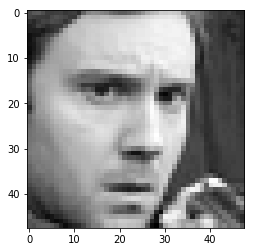

In [51]:
def PlotFunction(X,Y):
    plt.imshow(X.reshape(48,48),cmap='gray')
    print("This Pictue is " + str(label_map[Y]))
    plt.show()

PlotFunction(X[0],Y[0])

### Analyzing the data

The amount of angry pictures are more than the disgust pictures and this is a problem for the model.

In [52]:
print("The Shape of X is " + str(X.shape))
print("The Shape of Y is " + str(Y.shape))

X0 = X[Y==0,:]
Y0 = Y[Y==0]

X1 = X[Y==1,:]
Y1 = Y[Y==1]

print("The Shape of X0 is " + str(X0.shape))
print("The Shape of Y0 is " + str(Y0.shape))
print("The Shape of X1 is " + str(X1.shape))
print("The Shape of Y1 is " + str(Y1.shape))

The Shape of X is (5500, 2304)
The Shape of Y is (5500,)
The Shape of X0 is (4953, 2304)
The Shape of Y0 is (4953,)
The Shape of X1 is (547, 2304)
The Shape of Y1 is (547,)


This Pictue is Disgust


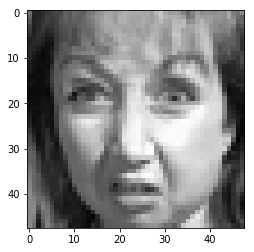

In [53]:
PlotFunction(X1[9],Y1[9])

##  Imbalance Problem

The amount of angry pictures are more than the disgust pictures and this is a problem for the model
To handle this problem it's necessary to repeat the disgusted pictures

In [54]:
X1R = np.repeat(X1,9,axis = 0)
X1R.shape

(4923, 2304)

In [55]:
X = np.vstack([X0,X1R])
print(X.shape)
Y = np.concatenate((Y0,[1]*len(X1R)))
print(Y.shape)

(9876, 2304)
(9876,)


## Some util Functions

The sigmoid funciton is a function that is between 0 and 1 and is the probability that $Y = 1$

The sigmoid cost is a function that computes the cost when we 

$$ Sigmoid\left(x\right) = \frac{1}{1+\exp \left(-x \right)} $$
$$ Sigmoid Cost = -\sum_{i = 1}^{n} Y_{i}\log \left(pY_{i} \right) + \left(1-Y_{i} \right)\log \left(pY_{i} \right)  $$


In [56]:
def SigmoidCost(Y,Py):
    return -(Y*np.log(Py)+(1-Y)*np.log(1-Py)).sum()

def error_rate(Y,Yhat):
    return np.mean(Y != Yhat)
def sigmoid(Y):
    return 1./(1+np.exp(-Y))



The iteration 0 Cost 691.006721547 Error 0.474
The iteration 1000 Cost 604.578610963 Error 0.331
The iteration 2000 Cost 583.43437004 Error 0.324
The iteration 3000 Cost 569.499145891 Error 0.313
The iteration 4000 Cost 559.141875615 Error 0.301
The iteration 5000 Cost 550.956526734 Error 0.287
The iteration 6000 Cost 544.210641267 Error 0.282
The iteration 7000 Cost 538.476318872 Error 0.271
The iteration 8000 Cost 533.486317696 Error 0.273
The iteration 9000 Cost 529.064991852 Error 0.271
The best validation is : 0.271


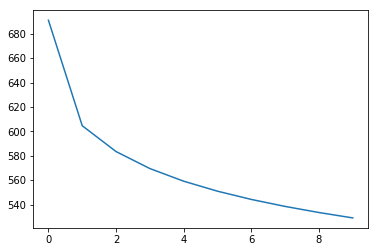

The Score is : 0.770453624949


In [57]:
class LogisticModel():
    def __init__(self):
        pass
    
    def fit(self,X,Y,learning_rate = 10e-7,reg = 0,epochs = 10000,show_figure=False):
        X,Y = shuffle(X,Y)
        X_valid,Y_valid = X[-1000:],Y[-1000:]
        X,Y = X[:-1000],Y[:-1000]
        N,D = X.shape
        self.W = np.random.randn(D)/np.sqrt(D)
        self.b = 0
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            Py = self.forward(X)
            self.W -= learning_rate*(np.dot(X.T,Py-Y) + reg*self.W)
            self.b -= learning_rate*((Py-Y).sum() + reg*self.b)
            
            if i%1000 == 0:
                PyValid = self.forward(X_valid)
                c = SigmoidCost(Y_valid,PyValid)
                costs.append(c)
                e = error_rate(Y_valid,np.round(PyValid))
                print("The iteration " + str(i) + " Cost " + str(c) + " Error " + str(e))
                if e < best_validation_error:
                    best_validation_error = e
        print("The best validation is : " + str(best_validation_error))
        if show_figure == True:
            plt.plot(costs)
            plt.show()
     
    def forward(self,X):
        return sigmoid(np.dot(X,self.W)+self.b)
    def predict(self,X):
        pY = self.forward(X)
        return np.round(pY),pY
    def Score(self,X,Y):
        prediction = self.predict(X)[0]
        return  1- error_rate(Y,prediction)
        
                
model = LogisticModel()
model.fit(X,Y,show_figure=True)
model.Score(X,Y)

print("The Score is : " + str(model.Score(X,Y)))

## Predict

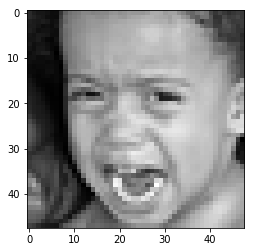

The Prediction is: Anger


In [58]:
def PlotFunctionPred(X):
    plt.imshow(X.reshape(48,48),cmap='gray')
    plt.show()
    
    
PlotFunctionPred(X[70])
print("The Prediction is: " + str(label_map[int(model.predict(X[70])[0])]))

## Predict on a new data

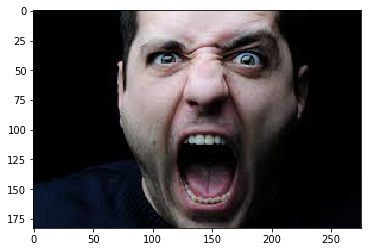

(183, 276, 3)

In [59]:
imgAngry=mpimg.imread('angrypicture2.jpeg')
plt.imshow(imgAngry)
plt.show()
imgAngry.shape

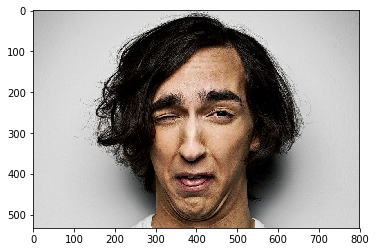

(533, 800, 3)

In [60]:
imgDisg=mpimg.imread('disgustpicture5.jpg')
plt.imshow(imgDisg)
plt.show()
imgDisg.shape

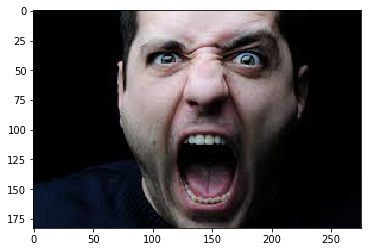

In [61]:
plt.imshow(imgAngry)
cv2.cvtColor(imgAngry,cv2.COLOR_BGR2RGB)
plt.show()

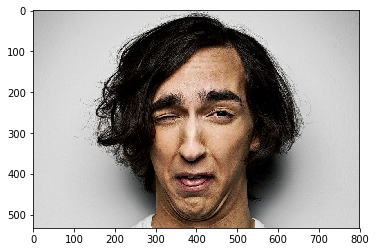

In [62]:
plt.imshow(imgDisg)
cv2.cvtColor(imgDisg,cv2.COLOR_BGR2RGB)
plt.show()

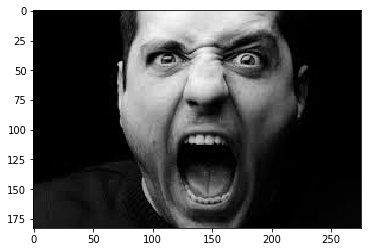

The Shape of the image is : (183, 276)


In [63]:
imgGrayAngry = cv2.cvtColor(imgAngry,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGrayAngry,cmap='gray')
plt.show()
print("The Shape of the image is : " + str(imgGrayAngry.shape))

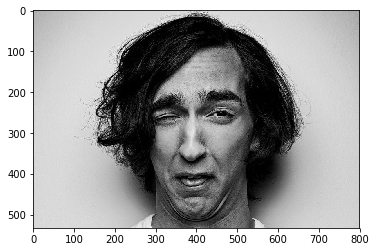

The Shape of the image is : (533, 800)


In [64]:
imgGrayDisg = cv2.cvtColor(imgDisg,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGrayDisg,cmap='gray')
plt.show()
print("The Shape of the image is : " + str(imgGrayDisg.shape))

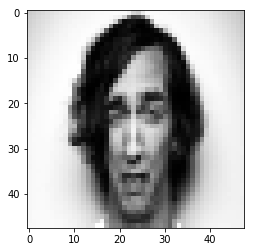

In [65]:
resizedDisg = cv2.resize(imgGrayDisg,(48,48), interpolation = cv2.INTER_AREA)
imgGrayFlatDisg = resizedDisg.flatten()
imgGrayFlatNormDisg= np.array(imgGrayFlatDisg)/255.0
plt.imshow(imgGrayFlatNormDisg.reshape(48,48),cmap='gray')
plt.show()

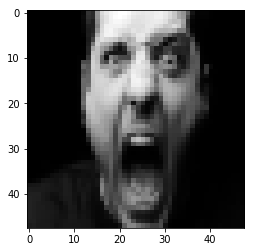

In [66]:
resizedAngry = cv2.resize(imgGrayAngry,(48,48), interpolation = cv2.INTER_AREA)
imgGrayFlatAngry = resizedAngry.flatten()
imgGrayFlatNormAngry = np.array(imgGrayFlatAngry)/255.0
plt.imshow(imgGrayFlatNormAngry.reshape(48,48),cmap='gray')
plt.show()

In [67]:
print("The Prediction is: " + str(label_map[int(model.predict(imgGrayFlatNormAngry)[0])]))
print("The probability that the picture will be disgust or 1 is : " + str(100-model.predict(imgGrayFlatNormAngry)[1]*100)+"%")

The Prediction is: Anger
The probability that the picture will be disgust or 1 is : 52.7234189345%


In [68]:
print("The Prediction is: " + str(label_map[int(model.predict(imgGrayFlatNormDisg)[0])]))
print("The probability that the picture will be disgust or 1 is : " + str(model.predict(imgGrayFlatNormDisg)[1]*100)+"%")

The Prediction is: Disgust
The probability that the picture will be disgust or 1 is : 69.7309754626%


# Ecommerce Project

This project is about to predict the action that will do the customer in a web page

In [73]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import plotly.plotly as py
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='gaston.farina', api_key='qp2zUcv3i5fIvwcecMhb')
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
Ecommerce = pd.read_csv("ecommerce_data.csv")
Ecommerce.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## Variables

The variables are:

`is_mobile`: if the user uses a mobile or not

`n_products_viewed` : Is the number of products that the user viewed

`visit_duration`:  how long is the Visit duration in minutes

`is_returning_visitor`:  a boolean variable

`time_of_day`:  Time of the day (0,1,2,3 split the 24hours)

`user_action`:  Time of the day (bounce,addtocar,begin_checkout,finishCheckout) this is the outcome variable



In [75]:
def NormalizeData(Vect):
    Vec = (Vect-Vect.mean())/Vect.std()
    return Vec

def OneHotEncoding(Vect):
    Vect = pd.get_dummies(Vect,prefix="time_of_day")
    return Vect

def DataProc(Base):
    Base['n_products_viewed'] = NormalizeData(Base['n_products_viewed'])
    Base['visit_duration'] = NormalizeData(Base['visit_duration'])
    OneHotTime = OneHotEncoding(Ecommerce['time_of_day'])
    Base = pd.concat([Base,OneHotTime], axis=1)
    Base = Base[['is_mobile','n_products_viewed','visit_duration','is_returning_visitor','time_of_day_0',
            'time_of_day_1','time_of_day_2','time_of_day_3','user_action']]
    Base = Base[Base['user_action']<=1]
    X = Base[['is_mobile','n_products_viewed','visit_duration','is_returning_visitor','time_of_day_0',
            'time_of_day_1','time_of_day_2','time_of_day_3']].as_matrix()
    Y = Base['user_action'].as_matrix()
    return(X,Y)

## Foward Pass with Random weights

The forward pass is $\hat{Y} = W \cdot X + b$ then the classification is with $\sigma \left(\hat{Y} \right)$ the classification rate is roughly $50 \%$

In [76]:
X,Y = DataProc(Ecommerce)
D = X.shape[1]
n = X.shape[0]
W = np.random.randn(D).reshape((D,1))
b = 0

def ForwardPass(X,W,b):
    Yhat = np.dot(X,W)+b
    return Yhat

def Sigmoid(Yhat):
    return 1/(1+np.exp(-Yhat))

def ClassificationRate(Y,Yhat):
    return np.mean(Y==Yhat)

Yhat = ForwardPass(X,W,b)
ClassYhat = Sigmoid(Yhat)
PredYhat = 1*(ClassYhat>0.5)
Rate = ClassificationRate(Y,PredYhat)

print("The classification Rate is: " + str(Rate))


The classification Rate is: 0.456364738264


## Train The Model

The shuffle function changes the position of the data and apply gradient descent to the linear classification model

![Title](GradientDescentLogistic.png)

In [77]:
X,Y = shuffle(X,Y)
W = np.random.randn(D).reshape((D,1))
b = 0

def GetTrainTest(X,Y,thresh):
    n_train = int(X.shape[0]*thresh)
    n_test = int(X.shape[0]-n_train)
    X_train = X[:n_train,:]
    Y_train = Y[:n_train]
    X_test = X[n_test:,:]
    Y_test = Y[n_test:]
    return X_train,Y_train,X_test,Y_test

def CrossEntropyError(TrueY,ProbY):
    return -np.mean(TrueY*np.log(ProbY)+(1-TrueY)*np.log(1-ProbY))

X_Train,Y_Train,X_Test,Y_Test = GetTrainTest(X,Y,0.8)
Y_Train = Y_Train.reshape((len(Y_Train),1))
Y_Test = Y_Test.reshape((len(Y_Test),1))

TrainCost = []
TestCost = []
lr = 0.001
for i in range(10000):
    PyTrain = Sigmoid(ForwardPass(X_Train,W,b))
    PyTest = Sigmoid(ForwardPass(X_Test,W,b))
    Error_Train = CrossEntropyError(Y_Train,PyTrain)
    Error_Test = CrossEntropyError(Y_Test,PyTest)
    TrainCost.append(Error_Train)
    TestCost.append(Error_Test)
    W -= lr*np.dot(X_Train.T,(PyTrain-Y_Train))
    b -= lr*np.sum((PyTrain-Y_Train))
    if i % 1000 == 0:
        print("Iteration is: " + str(i) + " Error Train is : " + str(Error_Train) + " Error Test is: "+ str(Error_Test))
PredTrainYhat = 1*(PyTrain>0.5)
PredTestYhat = 1*(PyTest>0.5)
print("Classification Rate In The Train Set Is: " + str(ClassificationRate(Y_Train,PredTrainYhat))) 
print("Classification Rate In The Test Set Is: " + str(ClassificationRate(Y_Test,PredTestYhat)))   
    


Iteration is: 0 Error Train is : 0.939421050163 Error Test is: 0.909977530691
Iteration is: 1000 Error Train is : 0.149342793658 Error Test is: 0.197328977486
Iteration is: 2000 Error Train is : 0.147361821728 Error Test is: 0.197173873585
Iteration is: 3000 Error Train is : 0.147133984755 Error Test is: 0.197558440787
Iteration is: 4000 Error Train is : 0.147100039379 Error Test is: 0.197768591283
Iteration is: 5000 Error Train is : 0.147094538869 Error Test is: 0.19786291079
Iteration is: 6000 Error Train is : 0.147093618704 Error Test is: 0.19790309427
Iteration is: 7000 Error Train is : 0.147093462799 Error Test is: 0.197919905729
Iteration is: 8000 Error Train is : 0.147093436246 Error Test is: 0.19792688986
Iteration is: 9000 Error Train is : 0.147093431714 Error Test is: 0.197929783128
Classification Rate In The Train Set Is: 0.974842767296
Classification Rate In The Test Set Is: 0.965408805031


In [78]:
TrainCost = np.array(TrainCost)
TestCost = np.array(TestCost)

trace = go.Scatter(
    x = np.arange(len(TrainCost)) ,
    y = TrainCost,
    mode = 'lines',
    name = 'Train Error'
    
)
trace1 = go.Scatter(
    x = np.arange(len(TestCost)),
    y = TestCost,
    mode = 'lines',
    name = 'Test Error'
)
layout = dict(title = 'Comparing Errors',
              xaxis=dict(
                   title='Itertions'
             ),
                yaxis=dict(
                   title='Error'
             )
  )
              

data = [trace,trace1]
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='TrainTest')


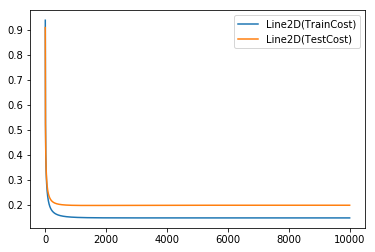

In [79]:
legend1, = plt.plot(TrainCost,label="TrainCost")
legend2, = plt.plot(TestCost,label="TestCost")
plt.legend([legend1,legend2])
plt.show()